# 逻辑回归预测考试通过
**任务：**  
基于examdata.csv数据，建立逻辑回归模型  
预测Exam1=75，Exam2=60时，该同学在下次考试是否通过  
建立二阶边界，提高模型准确度

In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam2')

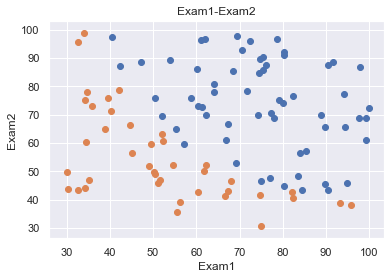

In [2]:
#visualize the data
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#add label mask
mask = data.loc[:, 'Pass'] == 1
fig1, ax1 = plt.subplots()
ax1.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
ax1.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask])
ax1.set_title('Exam1-Exam2')
ax1.set_xlabel('Exam1')
ax1.set_ylabel('Exam2')

In [3]:
#define X y
X = data.drop(['Pass'], axis=1)
y = data.loc[:, 'Pass']
X1 = data.loc[:, 'Exam1']
X2 = data.loc[:, 'Exam2']
#establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X, y)
#show the predicted result and its accuracy
y_predict = LR.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)
#predict exam1=70 exam2=65
y_test = LR.predict([[70, 65]])
print('passed' if y_test else 'failed')

0.89
passed


一阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$  
->$X_2 = -(\theta_0 + \theta_1 X_1)/\theta_2$

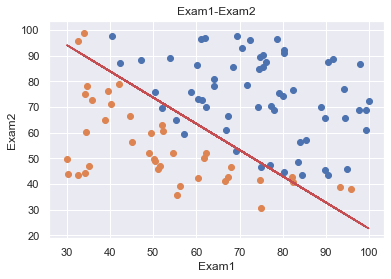

In [4]:
#画出边界线
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
X2_new = -(theta0 + theta1 * X1) / theta2
ax1.plot(X1, X2_new, 'r')
fig1

In [5]:
#create new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X1_2': X1_2,
    'X2_2': X2_2,
    'X1_X2': X1_X2
})
#establish the model and train it
LR2 = LogisticRegression()
LR2.fit(X_new, y)
#show the predicted result and its accuracy
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y, y2_predict)
accuracy2

1.0

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

->$a x^2 + b x + c=0: x1 = (-b+(b^2-4ac)^.5)/2a,x2 = (-b-(b^2-4ac)^.5)/2a$

->$\theta_4 X_2^2 + (\theta_5 X_1+ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$

In [6]:
#画出边界线
X1_new = X1.sort_values()
theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0]
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new * X1_new
X2_new_boundary = (-b + np.sqrt(b * b - 4 * a * c)) / (2 * a)

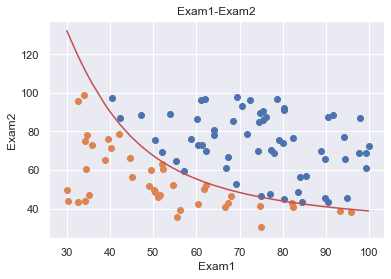

In [8]:
fig2, ax2 = plt.subplots()
ax2.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
ax2.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask])
ax2.set_title('Exam1-Exam2')
ax2.set_xlabel('Exam1')
ax2.set_ylabel('Exam2')
ax2.plot(X1_new, X2_new_boundary, 'r')